# Ridge & Lasso Regression

### What is Regularization?
- Regularization is a technique to reduce overfitting by penalizing large coefficients.
- Instead of only minimizing error, we also control model complexity.
- Loss = Error + Penalty

### Why Regularization is needed:
- Too many features
- Polynomial regression
- Multicollinearity
- Noisy data

### Types of Regularization:
- L1 Regularization (Lasso Regression)
- L2 Regularization (Ridge Regression)
- Elastic Net (L1 + L2)

### Ridge Regression - (L2 Regularization)
- Ridge Regression is a regularization technique used to reduce overfitting by adding a penality term based on the square of coefficient to the loss function
- 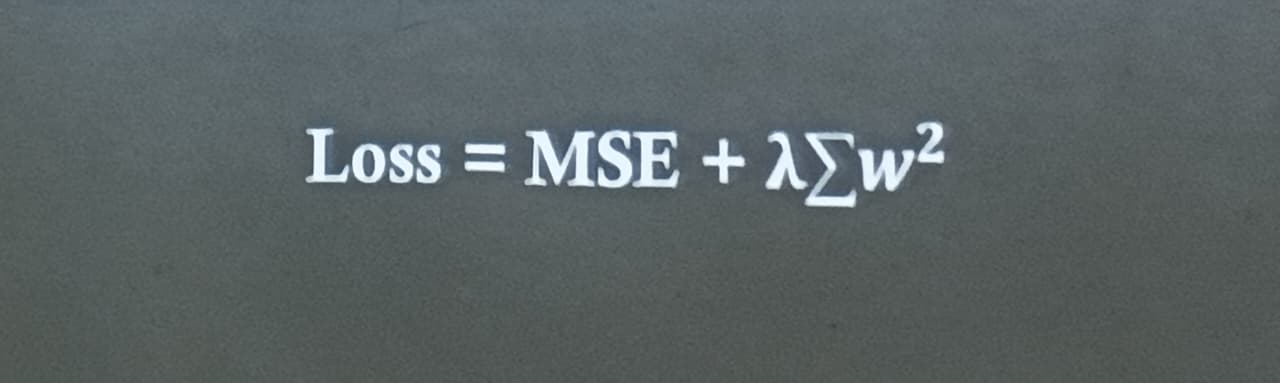

### Why Rige Regression is needed :
- Linear and Polynomial model tend to overfit
- Large coefficient make the model unstable
- Multicollinearity causes Coefficient fluctuation
- Note : Riddge controls Model Complexity

### Lasso Regression (L1 Regularization) :
- Ridge Regression is a regularization technique used to reduce overfitting by adding a penality based on the absolute value of coefficient, which can force some coefficient to become exactly zero.
- LASSO : Least Absolute Shrinkage and Selection Operator.
- 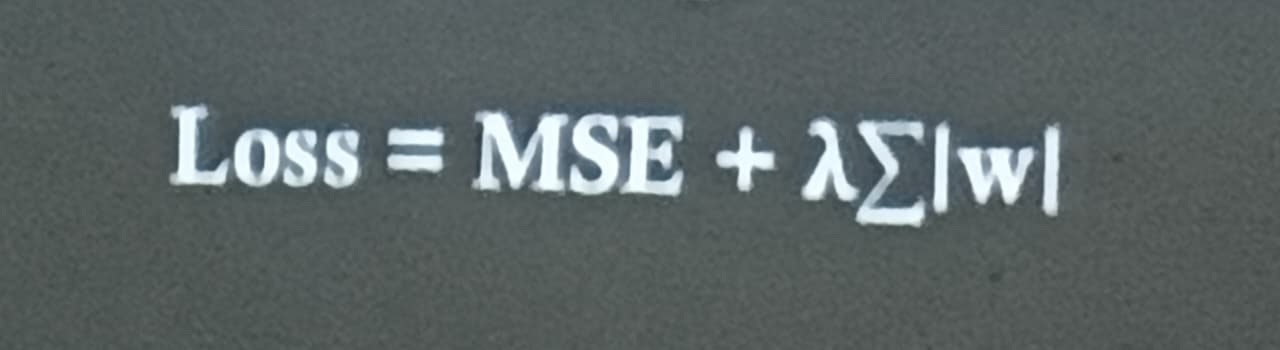

### Why Lasso Regression is needed;
- Some datasets contain Irrelevant or noisy Features
- Too many Features increase model complexity
- Difficult to Interpret models with many coefficients
##### Note:
- Lasso simplifies the model by removing unnecessary features.

### Use Ridge when
 - Many correlated features
 - All variables are important

### Use Lasso when
 - Too many features
 - Need feature selection

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [6]:
data = {
    "Area":[800, 900 ,1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700],
    "Bedrooms":[1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    "Bathrooms":[1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
    "Age":[15, 12, 10, 8, 6, 5, 4, 3, 2, 1],
    "Distance_City":[15, 14, 13, 13, 10, 9, 8, 7, 6, 5],
    "Price":[40, 50, 55, 60, 70, 75, 80, 90, 95, 100]   
}
df = pd.DataFrame(data)
df

,Area,Bedrooms,Bathrooms,Age,Distance_City,Price
0,800,1,1,15,15,40
1,900,2,1,12,14,50
2,1000,2,2,10,13,55
3,1100,2,2,8,13,60
4,1200,3,2,6,10,70
5,1300,3,2,5,9,75
6,1400,3,3,4,8,80
7,1500,4,3,3,7,90
8,1600,4,3,2,6,95
9,1700,4,3,1,5,100


In [7]:
X = df.drop("Price", axis=1)   # multiple columns
Y = df["Price"]

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)

In [79]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
linear = LinearRegression()
linear.fit(X_train_scaled, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [81]:
ridge = Ridge(alpha=2.0)
ridge.fit(X_train_scaled, Y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",2.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [62]:
Y_train_pred_lin = linear.predict(X_train_scaled)
Y_test_pred_lin = linear.predict(X_test_scaled)

In [63]:
train_mse_lin = mean_squared_error(Y_train,Y_train_pred_lin)
test_mse_lin = mean_squared_error(Y_test,Y_test_pred_lin)

In [64]:
print("Train MSE:", train_mse_lin)
print("Test MSE:", test_mse_lin)

Train MSE: 8.835242138475332e-29
Test MSE: 2.0194839173657902e-28


In [65]:
Y_train_pred_rid = ridge.predict(X_train_scaled)
Y_test_pred_rid = ridge.predict(X_test_scaled)

In [66]:
train_mse_rid = mean_squared_error(Y_train, Y_train_pred_rid)
test_mse_rid = mean_squared_error(Y_test, Y_test_pred_rid)

In [67]:
print("Train MSE:", train_mse_rid)
print("Test MSE:", test_mse_rid)

Train MSE: 2.786673332682682
Test MSE: 2.9866018717850813


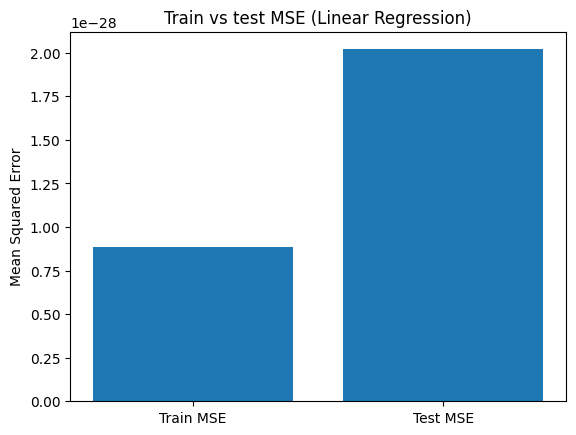

In [68]:
plt.bar(["Train MSE", "Test MSE"], [train_mse_lin, test_mse_lin])
plt.ylabel("Mean Squared Error")
plt.title("Train vs test MSE (Linear Regression)")
plt.show()

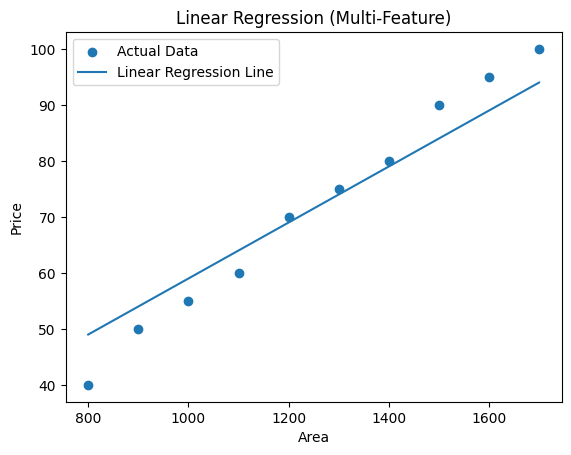

In [83]:
X_plot_scaled = scaler.transform(X_plot)
y_line = linear.predict(X_plot_scaled)
plt.scatter(df["Area"], df["Price"], label="Actual Data")
plt.plot(X_plot["Area"], y_line, label="Linear Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression (Multi-Feature)")
plt.legend()
plt.show()

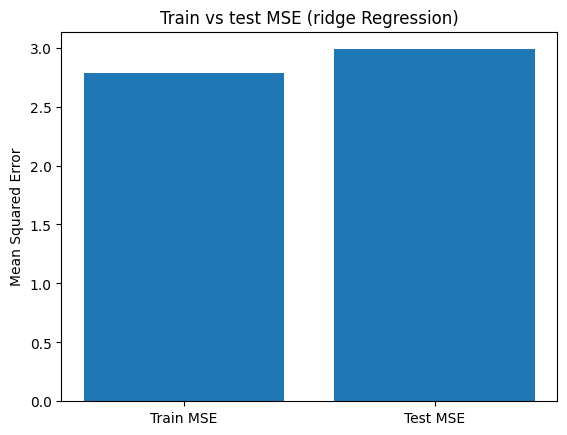

In [84]:
plt.bar(["Train MSE", "Test MSE"], [train_mse_rid, test_mse_rid])
plt.ylabel("Mean Squared Error")
plt.title("Train vs test MSE (ridge Regression)")
plt.show()

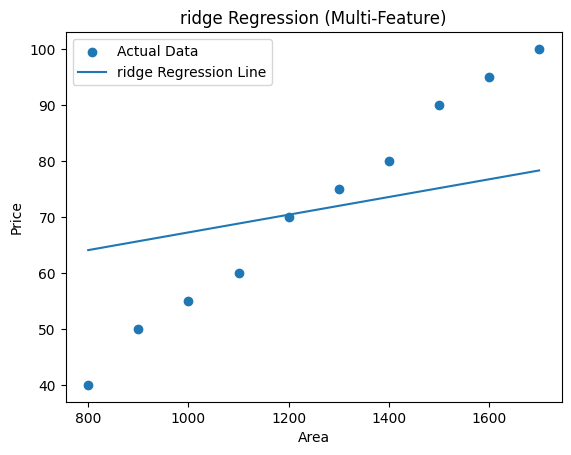

In [85]:
X_plot_scaled = scaler.transform(X_plot)
y_line = ridge.predict(X_plot_scaled)
plt.scatter(df["Area"], df["Price"], label="Actual Data")
plt.plot(X_plot["Area"], y_line, label="ridge Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("ridge Regression (Multi-Feature)")
plt.legend()
plt.show()

# Lasso Regression

In [70]:
lasso = Lasso(alpha=0.5)       # alpha = regularization strength
lasso.fit(X_train_scaled, Y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.5
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [71]:
Y_train_pred = lasso.predict(X_train_scaled)
Y_test_pred = lasso.predict(X_test_scaled)

In [72]:
Train_MSE_Lasso = mean_squared_error(Y_train, Y_train_pred)
Test_MSE_Lasso = mean_squared_error(Y_test, Y_test_pred)

In [73]:
print("Train MSE:", Train_MSE_Lasso)
print("Test MSE:", Test_MSE_Lasso)

Train MSE: 0.2546571187190856
Test MSE: 0.353946799554131


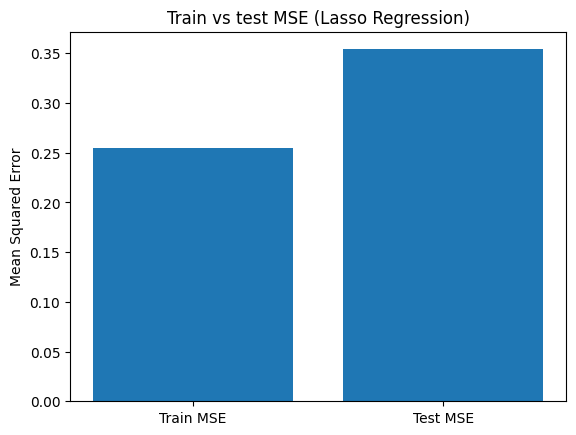

In [74]:
plt.bar(["Train MSE", "Test MSE"], [Train_MSE_Lasso, Test_MSE_Lasso])
plt.ylabel("Mean Squared Error")
plt.title("Train vs test MSE (Lasso Regression)")
plt.show()

In [76]:
X_plot = pd.DataFrame({
"Area": np.linspace(df["Area"].min(), df["Area"].max(), 100),
"Bedrooms": df[ "Bedrooms"].mean(),
"Bathrooms": df["Bathrooms"].mean(),
"Age": df["Age"].mean(),
"Distance_City": df ["Distance_City"].mean()
})

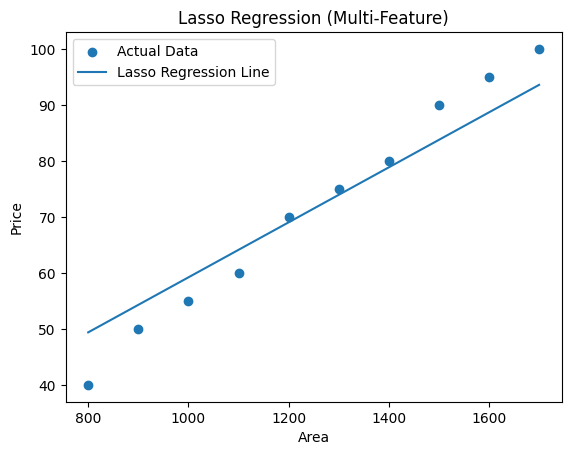

In [77]:
X_plot_scaled = scaler.transform(X_plot)
y_line = lasso.predict(X_plot_scaled)
plt.scatter(df["Area"], df["Price"], label="Actual Data")
plt.plot(X_plot["Area"], y_line, label="Lasso Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Lasso Regression (Multi-Feature)")
plt.legend()
plt.show()